# Analyzing the Best Sellers Dataset with Exploratory Data Analysis

### Import libraries and study the Dataset

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
# load dataset
data = pd.read_csv("bestsellers with categories.csv")

In [4]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
data.shape

(550, 7)

In [6]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
The information above shows that the data is clean

### Check for Missing Values

In [9]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [ ]:
There are no missing values

### To find Authors with Highest User Rating

In [13]:
data["User Rating"]

0      4.7
1      4.6
2      4.7
3      4.7
4      4.8
      ... 
545    4.9
546    4.7
547    4.7
548    4.7
549    4.7
Name: User Rating, Length: 550, dtype: float64

In [15]:
data.rename(columns = {'User Rating':'UserRating'}, inplace = True)
HighAuthors = data.query('UserRating==4.9')
HighAuthors["Author"].unique()

array(['Bill Martin Jr.', 'Dav Pilkey', 'Sherri Duskey Rinker',
       'Lin-Manuel Miranda', 'J.K. Rowling', 'J. K. Rowling',
       'Brandon Stanton', 'Sarah Young', 'Jill Twiss', 'Alice Schertle',
       'Pete Souza', 'Dr. Seuss', 'Rush Limbaugh', 'Nathan W. Pyle',
       'Patrick Thorpe', 'Chip Gaines', 'Eric Carle',
       'Emily Winfield Martin', 'Mark R. Levin', 'Jeff Kinney'],
      dtype=object)

In [24]:
HighAuthors["Author"].value_counts()

Dr. Seuss                8
Eric Carle               7
Dav Pilkey               7
Sarah Young              6
Emily Winfield Martin    4
J.K. Rowling             3
Bill Martin Jr.          2
Sherri Duskey Rinker     2
Rush Limbaugh            2
Nathan W. Pyle           1
Mark R. Levin            1
Chip Gaines              1
Patrick Thorpe           1
Pete Souza               1
Alice Schertle           1
Jill Twiss               1
Brandon Stanton          1
J. K. Rowling            1
Lin-Manuel Miranda       1
Jeff Kinney              1
Name: Author, dtype: int64

In [ ]:
We can infer that Dr. Seuss is the Author with the highest rating

### To Find Book Name with highest and lowest number of reviews

In [28]:
highreview = data["Reviews"].max()
highreview

87841

In [29]:
data[data["Reviews"]==data["Reviews"].max()]

,Name,Author,UserRating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [32]:
lowreview = data["Reviews"].min()
lowreview

37

In [30]:
data[data["Reviews"]==data["Reviews"].min()]

,Name,Author,UserRating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction


In [ ]:
We can infer that;
Book Name - Where the Crawdads Sing has the highest review while 
Book Name - Divine Soul Mind Body Healing and Transmission has the lowest review

### To find Book Name with highest and lowest Price

In [33]:
data[data["Price"]==data["Price"].max()]

,Name,Author,UserRating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction


In [39]:
data[data["Price"]==data["Price"].max()]['Name'].value_counts()

Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5    2
Name: Name, dtype: int64

In [41]:
data[data["Price"]==data["Price"].min()]

,Name,Author,UserRating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


In [43]:
data[data["Price"]==data["Price"].min()]['Name'].value_counts()

To Kill a Mockingbird                                                           4
Cabin Fever (Diary of a Wimpy Kid, Book 6)                                      1
Diary of a Wimpy Kid: Hard Luck, Book 8                                         1
Frozen (Little Golden Book)                                                     1
JOURNEY TO THE ICE P                                                            1
Little Blue Truck                                                               1
The Constitution of the United States                                           1
The Getaway                                                                     1
The Short Second Life of Bree Tanner: An Eclipse Novella (The Twilight Saga)    1
Name: Name, dtype: int64

In [ ]:
We can see that the Book Name with the highest price is Diagnostic and Statistical Manual of Mental Disorders, While
the Book Names with the lowest price are;
To Kill a Mockingbird                                                           
Cabin Fever (Diary of a Wimpy Kid, Book 6)                                      
Diary of a Wimpy Kid: Hard Luck, Book 8                                         
Frozen (Little Golden Book)                                                     
JOURNEY TO THE ICE P                                                            
Little Blue Truck                                                               
The Constitution of the United States                                           
The Getaway                                                                     
The Short Second Life of Bree Tanner: An Eclipse Novella (The Twilight Saga)

### To find the Year with the highest and lowest number of sales

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

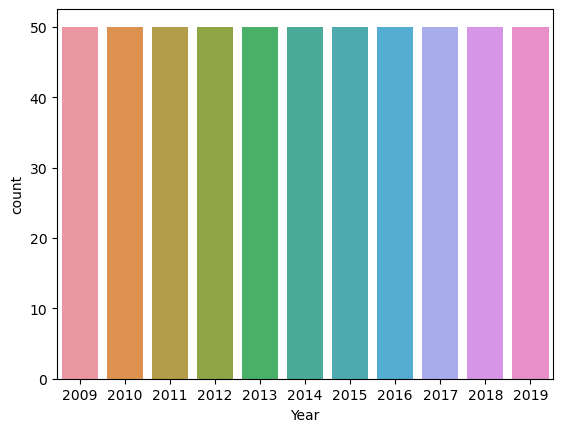

In [44]:
sns.countplot(data['Year'])

In [45]:
data["Year"].value_counts()

2016    50
2011    50
2018    50
2017    50
2019    50
2014    50
2010    50
2009    50
2015    50
2013    50
2012    50
Name: Year, dtype: int64

In [ ]:
We can see that there is same and equal number of sales across the years 2009 - 2019.

### To find the Count of fiction and non fiction books

In [47]:
data['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

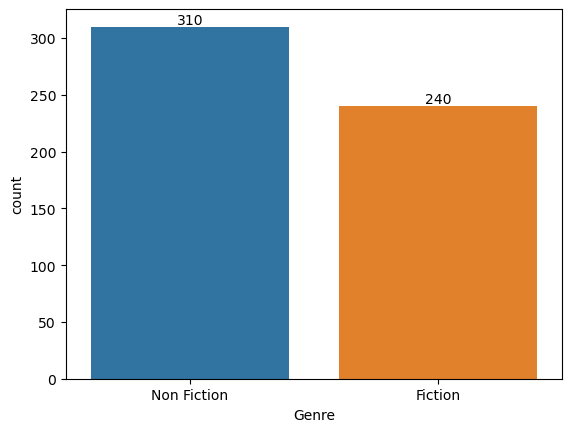

In [51]:
%matplotlib inline
count=sns.countplot(x='Genre', data=data)
for container in count.containers:
    count.bar_label(container)

In [ ]:
We can see that Count of fiction books are 240 and Non fiction books are 310. We have more Non-fiction books

### To Categorize User Rating

In [52]:
def categoryrating(r):
    if r>=4.0 and r<4.2:
        return "One Time Watch"
    elif r>=4.2 and r<4.4:
        return "Average"
    elif r>=4.4 and r<4.6:
        return "Hit"
    elif r>=4.6 and r<4.8:
        return "Super Hit"
    elif r>=4.8 and r<=5.0:
        return "Blockbuster"
    

data["CategoryRating"] = [categoryrating(i) for i in data["UserRating"]]
data.head(10)

,Name,Author,UserRating,Reviews,Price,Year,Genre,CategoryRating
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,Super Hit
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,Super Hit
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Super Hit
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,Super Hit
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,Blockbuster
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,Hit
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction,Super Hit
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction,Super Hit
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,Super Hit
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction,Super Hit


In [54]:
data["CategoryRating"].value_counts()

Super Hit         213
Blockbuster       179
Hit                98
Average            33
One Time Watch     20
Name: CategoryRating, dtype: int64

In [57]:
data["Year"].value_counts().index

Int64Index([2016, 2011, 2018, 2017, 2019, 2014, 2010, 2009, 2015, 2013, 2012], dtype='int64')

In [58]:
catdata = data[data["CategoryRating"]=="Blockbuster"]
catdata

,Name,Author,UserRating,Reviews,Price,Year,Genre,CategoryRating
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,Blockbuster
19,Alexander Hamilton,Ron Chernow,4.8,9198,13,2016,Non Fiction,Blockbuster
30,Barefoot Contessa Foolproof: Recipes You Can T...,Ina Garten,4.8,1296,24,2012,Non Fiction,Blockbuster
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,Blockbuster
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction,Blockbuster
...,...,...,...,...,...,...,...,...
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction,Blockbuster
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction,Blockbuster
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction,Blockbuster
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction,Blockbuster


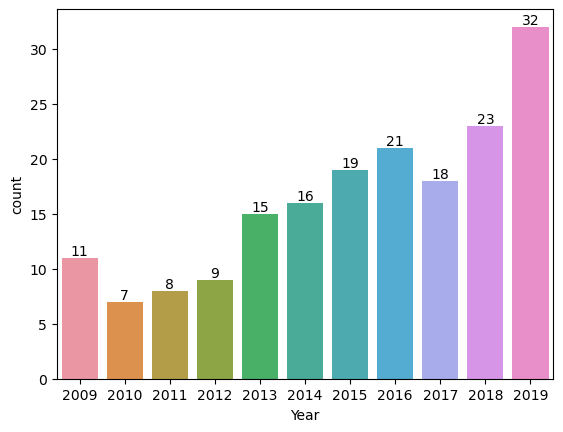

In [59]:
cn=sns.countplot(x="Year",data=catdata)
for container in cn.containers:
    cn.bar_label(container)

In [ ]:
In Year 2019, we got maximum number of blockbusters=32
In Year 2010, we got minimum number of blockbusters=7

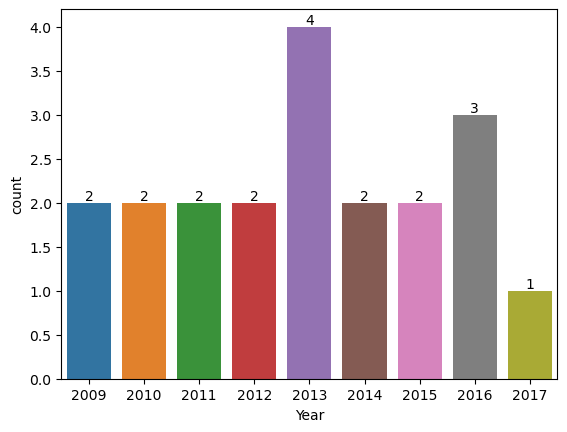

In [60]:
flop = data[data["CategoryRating"]=="One Time Watch"]
cn=sns.countplot(x="Year",data=flop)
for container in cn.containers:
    cn.bar_label(container)

In [ ]:
In Year 2013, we got maximum number of flops=4
In Year 2017, we got minimum number of flops=1

### To find Price comparison between Non Fiction and Fiction

<AxesSubplot:xlabel='Genre', ylabel='Price'>

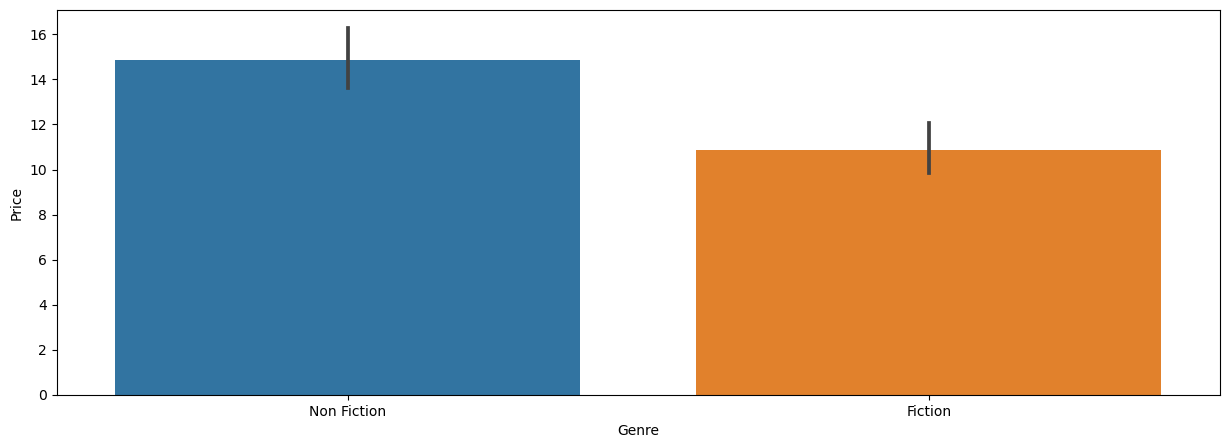

In [62]:
plt.figure(figsize=[15,5])
sns.barplot(x="Genre",y="Price",data=data)

In [ ]:
We can infer that Non fiction books cost more than fiction books

### To find Book prices with lowest and highest sales

In [63]:
data["Price"].value_counts().index

Int64Index([  8,   6,   9,   5,  11,   4,  14,  13,  10,  12,   7,  15,  16,
             17,  20,  18,   0,  46,  21,  22,  28,  24,  23,   2,  40,  30,
             19,  27,  32,  25, 105,  52,  54,   3,  39,  53,   1,  36,  82,
             42],
           dtype='int64')

In [64]:
data["Price"].value_counts().values

array([52, 38, 38, 36, 35, 32, 30, 29, 28, 27, 23, 21, 20, 19, 17, 14, 12,
       10,  9,  6,  6,  5,  5,  5,  5,  5,  4,  4,  2,  2,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1], dtype=int64)

Text(0.5, 1.0, 'PRICE COMPARISON')

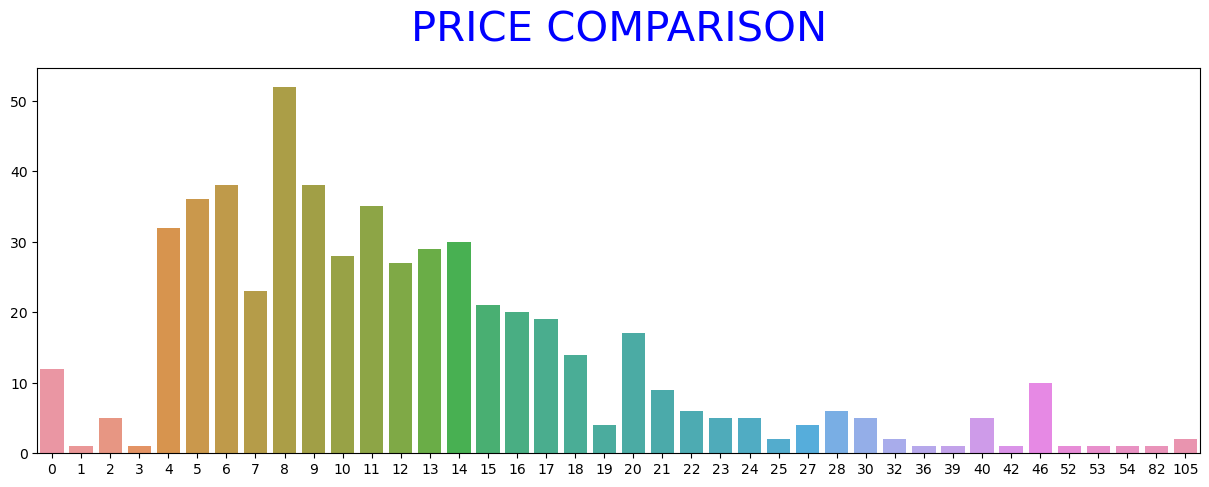

In [67]:
plt.figure(figsize=[15,5])
sns.barplot(x=data["Price"].value_counts().index,
            y=data["Price"].value_counts().values).set_title("PRICE COMPARISON", 
                                                                 fontsize=30, 
                                                                 color='Blue', 
                                                             pad =20)

In [ ]:
Books with price 8 have the highest sales, and
Books with price 1,3,36,39,42,52,53,54,82 got the lowest sales

In [ ]:
REPORT

My conclusion and findings from the Exploratory Data Analysis are;

1. We can infer that Dr. Seuss is the Author with the highest user rating, with rating of 8.

2. We can infer that;
   Book Name - Where the Crawdads Sing has the highest review, While 
   Book Name - Divine Soul Mind Body Healing and Transmission has the lowest review

3. We can see that the Book Name with the highest price is Diagnostic and Statistical Manual of Mental Disorders, While
  the Book Names with the lowest price are;
  To Kill a Mockingbird                                                           
  Cabin Fever (Diary of a Wimpy Kid, Book 6)                                      
  Diary of a Wimpy Kid: Hard Luck, Book 8                                         
  Frozen (Little Golden Book)                                                     
  JOURNEY TO THE ICE P                                                            
  Little Blue Truck                                                               
  The Constitution of the United States                                           
  The Getaway                                                                     
  The Short Second Life of Bree Tanner: An Eclipse Novella (The Twilight Saga)

4. We can see that there is same and equal number of sales across the years 2009 - 2019.

5. We can see that the Count of fiction books are 240 and Non fiction books are 310. We have more Non-fiction books

6. User Rating has been categorized on an additional column named- CategoryRating.
   Further insights shows,
   In Year 2019, we got maximum number of blockbusters=32, While in Year 2010, we got minimum number of blockbusters=7  
   In Year 2013, we got maximum number of flops=4, While in Year 2017, we got minimum number of flops=1

7. We can infer that Non fiction books cost more than fiction books.

8. Books with price 8 have the highest sales while Books with price 1,3,36,39,42,52,53,54,82 got the lowest sales.
